In [16]:
!pip install numpy pandas matplotlib scikit-learn seaborn --quiet

# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [17]:
ruta_csv = "marketing_campaign.csv"

# Cargar con separador tabulación
df = pd.read_csv(ruta_csv, sep="\t")

print(df.head())
print(df.columns)

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [18]:
df.dtypes


,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [19]:
# Mostrar resumen general y tipos de datos
print(df.info())

# Contar valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Porcentaje de nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print(df.isnull().mean() * 100)

# Contar filas con valores nulos en al menos una columna
print("\nFilas con al menos un valor nulo:")
print(df.isnull().any(axis=1).sum())

# Contar filas duplicadas (filas idénticas)
print("\nFilas duplicadas:")
print(df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [20]:
# Rellenar nulos con la mediana
df['Income'].fillna(df['Income'].median(), inplace=True)

/tmp/ipython-input-3606226331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


=== ANÁLISIS COMPLETO DE OUTLIERS ===
               Variable  Outliers  Porcentaje     Min       Max        Q1  \
9      MntSweetProducts       248   11.071429     0.0     263.0      1.00   
6             MntFruits       227   10.133929     0.0     199.0      1.00   
8       MntFishProducts       223    9.955357     0.0     259.0      3.00   
10         MntGoldProds       207    9.241071     0.0     362.0      9.00   
7       MntMeatProducts       175    7.812500     0.0    1725.0     16.00   
11    NumDealsPurchases        86    3.839286     0.0      15.0      1.00   
5              MntWines        35    1.562500     0.0    1493.0     23.75   
13  NumCatalogPurchases        23    1.026786     0.0      28.0      0.00   
1                Income         8    0.357143  1730.0  666666.0  35538.75   
15    NumWebVisitsMonth         8    0.357143     0.0      20.0      3.00   
12      NumWebPurchases         4    0.178571     0.0      27.0      2.00   
0            Year_Birth         3    0

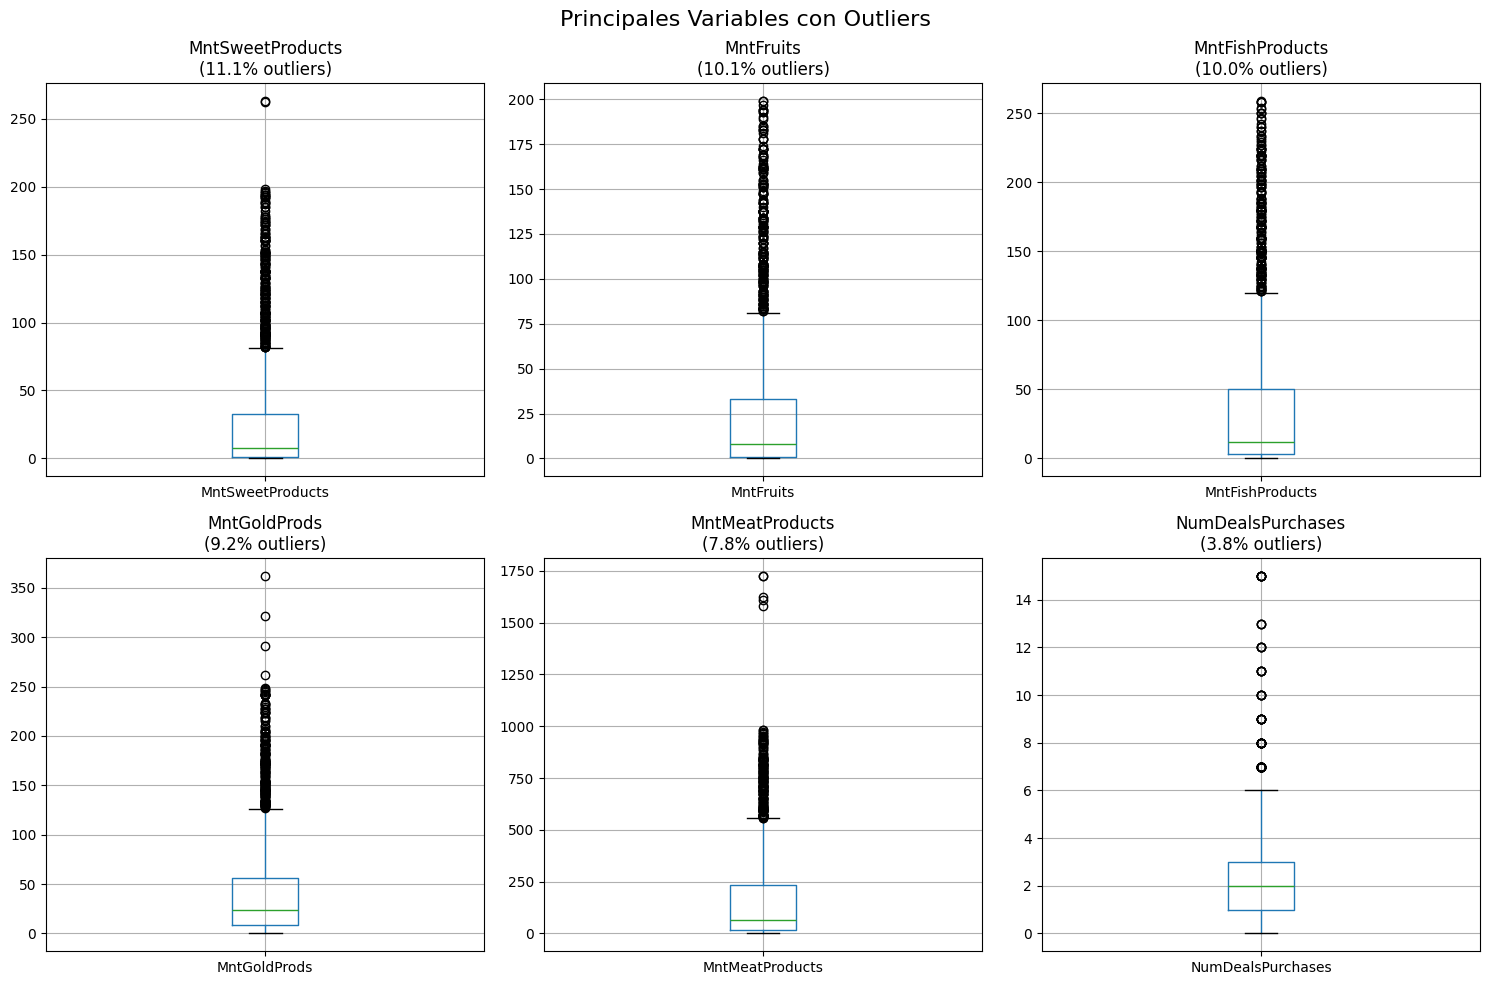


=== ANÁLISIS DETALLADO DE VARIABLES CLAVE ===

Income:
  - Rango normal: [-13587.8, 117416.2]
  - Valores extremos: < -13587.8 o > 117416.2
  - Extremos altos: [666666.0, 162397.0, 160803.0]

MntWines:
  - Rango normal: [-697.0, 1225.0]
  - Valores extremos: < -697.0 o > 1225.0
  - Extremos altos: [1493, 1492, 1492]

MntMeatProducts:
  - Rango normal: [-308.0, 556.0]
  - Valores extremos: < -308.0 o > 556.0
  - Extremos altos: [1725, 1725, 1622]

Year_Birth:
  - Rango normal: [1932.0, 2004.0]
  - Valores extremos: < 1932.0 o > 2004.0
  - Extremos bajos: [1893, 1899, 1900]

NumWebVisitsMonth:
  - Rango normal: [-3.0, 13.0]
  - Valores extremos: < -3.0 o > 13.0
  - Extremos altos: [20, 20, 20]

=== RECOMENDACIONES ===
1. Income: Considerar winsorizar o transformación logarítmica
2. Montos de gasto (MntWines, etc.): Podrían ser clientes premium reales
3. Year_Birth: Verificar edades extremas (muy jóvenes/muy viejos)
4. Variables de conteo: Pueden ser comportamientos reales del cliente


In [35]:
# --- ANÁLISIS COMPLETO DE OUTLIERS PARA TODAS LAS COLUMNAS NUMÉRICAS ---
import numpy as np

# Todas las columnas numéricas (excluyendo ID y constantes)
numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
               'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
               'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
               'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
               'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
               'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

print("=== ANÁLISIS COMPLETO DE OUTLIERS ===")

outliers_summary = []
for var in numeric_cols:
    if df[var].dtype in ['int64', 'float64']:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1

        if IQR > 0:  # Evitar división por cero
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers_count = df[(df[var] < lower_bound) | (df[var] > upper_bound)].shape[0]
            outliers_pct = (outliers_count / len(df)) * 100

            outliers_summary.append({
                'Variable': var,
                'Outliers': outliers_count,
                'Porcentaje': outliers_pct,
                'Min': df[var].min(),
                'Max': df[var].max(),
                'Q1': Q1,
                'Q3': Q3
            })

# Crear DataFrame resumen
outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df.sort_values('Porcentaje', ascending=False))

# --- OUTLIERS CRÍTICOS A REVISAR ---
print("\n=== VARIABLES CON MÁS DEL 5% DE OUTLIERS ===")
critical_outliers = outliers_df[outliers_df['Porcentaje'] > 5]
print(critical_outliers)

# --- VISUALIZACIÓN DE OUTLIERS MÁS IMPORTANTES ---
import matplotlib.pyplot as plt
import seaborn as sns

# Variables con mayor porcentaje de outliers
top_vars = outliers_df.nlargest(6, 'Porcentaje')['Variable'].tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Principales Variables con Outliers', fontsize=16)

for i, var in enumerate(top_vars):
    ax = axes[i//3, i%3]
    df.boxplot(column=var, ax=ax)
    ax.set_title(f'{var}\n({outliers_df[outliers_df["Variable"]==var]["Porcentaje"].iloc[0]:.1f}% outliers)')

plt.tight_layout()
plt.show()

# --- ANÁLISIS ESPECÍFICO DE VARIABLES CLAVE ---
print("\n=== ANÁLISIS DETALLADO DE VARIABLES CLAVE ===")

key_vars = ['Income', 'MntWines', 'MntMeatProducts', 'Year_Birth', 'NumWebVisitsMonth']
for var in key_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    print(f"\n{var}:")
    print(f"  - Rango normal: [{lower_bound:.1f}, {upper_bound:.1f}]")
    print(f"  - Valores extremos: < {lower_bound:.1f} o > {upper_bound:.1f}")

    # Valores extremos superiores
    extreme_high = df[df[var] > upper_bound][var]
    if len(extreme_high) > 0:
        print(f"  - Extremos altos: {extreme_high.nlargest(3).tolist()}")

    # Valores extremos inferiores
    extreme_low = df[df[var] < lower_bound][var]
    if len(extreme_low) > 0:
        print(f"  - Extremos bajos: {extreme_low.nsmallest(3).tolist()}")

# --- TRATAMIENTO SUGERIDO ---
print("\n=== RECOMENDACIONES ===")
print("1. Income: Considerar winsorizar o transformación logarítmica")
print("2. Montos de gasto (MntWines, etc.): Podrían ser clientes premium reales")
print("3. Year_Birth: Verificar edades extremas (muy jóvenes/muy viejos)")
print("4. Variables de conteo: Pueden ser comportamientos reales del cliente")

In [36]:
# Solo corregir los errores evidentes
df['Income'] = df['Income'].replace(666666, df['Income'].median())
df = df[df['Year_Birth'] > 1920]

# Los outliers de gastos DÉJALOS - son clientes reales de alto valor
print(f"Dataset final: {len(df)} filas")

Dataset final: 2237 filas


In [38]:
# --- 1. Variables continuas  ---
continuas = [
    'Income', 'Recency', 'Year_Birth',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]

# --- 2. Variables categóricas a convertir en dummies ---
cat_vars = ['Education', 'Marital_Status']

# --- 3. Variables binarias que ya están como números ---
binarias = [
    'Kidhome', 'Teenhome',
    'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
    'AcceptedCmp1','AcceptedCmp2','Complain','Response'
]

# --- 4. Crear dummies de Education y Marital_Status ---
df_dummies = pd.get_dummies(df[cat_vars], prefix=cat_vars, drop_first=False)

# --- 5. Escalar solo las continuas ---
scaler = StandardScaler()
df_scaled_cont = pd.DataFrame(
    scaler.fit_transform(df[continuas]),
    columns=continuas,
    index=df.index
)

# --- 6. Unir todo: continuas escaladas + binarias + dummies ---
X_scaled = pd.concat([df_scaled_cont, df[binarias], df_dummies], axis=1)

#  Ahora X_scaled está listo para KMeans
print(X_scaled.head())

     Income   Recency  Year_Birth  MntWines  MntFruits  MntMeatProducts  \
0  0.289023  0.307272   -1.017296  0.983671   1.554623         1.680253   
1 -0.262050 -0.383584   -1.273722 -0.870717  -0.636422        -0.713250   
2  0.918640 -0.798098   -0.333495  0.362570   0.572430        -0.176928   
3 -1.182435 -0.798098    1.290534 -0.870717  -0.560868        -0.651196   
4  0.296265  1.550812    1.034108 -0.389289   0.421324        -0.216820   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0         2.461700          1.475877      0.846061           0.348371  ...   
1        -0.650275         -0.631440     -0.729569          -0.169096  ...   
2         1.345050         -0.147000     -0.037829          -0.686563  ...   
3        -0.503829         -0.582996     -0.748784          -0.169096  ...   
4         0.155177         -0.001667     -0.556634           1.383304  ...   

   Education_Master  Education_PhD  Marital_Status_Absurd  \
0             False

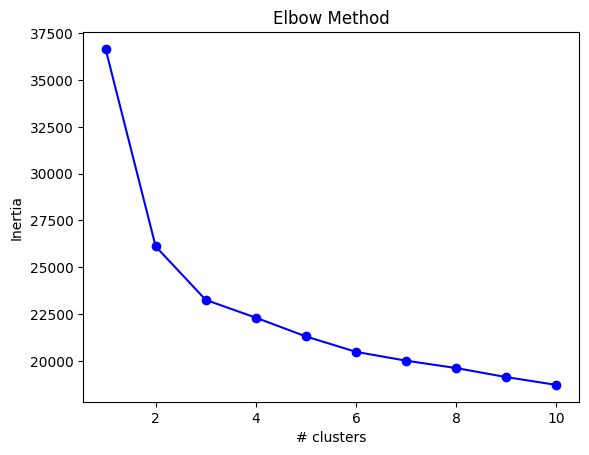

In [39]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("# clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()




In [42]:
# Definir número de clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Ajustar y predecir
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Ver cuántos clientes cayeron en cada cluster
print(df['Cluster'].value_counts())

Cluster
2    1012
0     615
1     610
Name: count, dtype: int64


In [43]:
cluster_summary = df.groupby('Cluster')[continuas + binarias].mean()
print(cluster_summary)


               Income    Recency   Year_Birth    MntWines  MntFruits  \
Cluster                                                                
0        56990.487805  47.536585  1964.848780  456.564228  19.239024   
1        75404.890164  49.719672  1968.390164  591.040984  68.978689   
2        34754.242589  49.686759  1971.672925   38.256917   4.800395   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             128.785366        26.575610         19.541463     57.481301   
1             446.567213        99.759016         71.473770     78.898361   
2              21.525692         6.662055          4.877470     14.702569   

         NumDealsPurchases  ...  NumWebVisitsMonth   Kidhome  Teenhome  \
Cluster                     ...                                          
0                 3.835772  ...           5.891057  0.286179  0.884553   
1                 1.396721  ...

In [44]:
for col in cat_vars:
    print(f"\nDistribución de {col} por cluster:")
    print(df.groupby('Cluster')[col].value_counts(normalize=True))



Distribución de Education por cluster:
Cluster  Education 
0        Graduation    0.461789
         PhD           0.284553
         Master        0.195122
         2n Cycle      0.056911
         Basic         0.001626
1        Graduation    0.565574
         PhD           0.198361
         Master        0.140984
         2n Cycle      0.093443
         Basic         0.001639
2        Graduation    0.492095
         PhD           0.186759
         Master        0.162055
         2n Cycle      0.107708
         Basic         0.051383
Name: proportion, dtype: float64

Distribución de Marital_Status por cluster:
Cluster  Marital_Status
0        Married           0.398374
         Together          0.263415
         Single            0.164228
         Divorced          0.126829
         Widow             0.042276
         YOLO              0.003252
         Alone             0.001626
1        Married           0.368852
         Together          0.260656
         Single            0.23278

📊 Promedios por cluster (continuas + binarias):
               Income    Recency   Year_Birth    MntWines  MntFruits  \
Cluster                                                                
0        56990.487805  47.536585  1964.848780  456.564228  19.239024   
1        75404.890164  49.719672  1968.390164  591.040984  68.978689   
2        34754.242589  49.686759  1971.672925   38.256917   4.800395   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             128.785366        26.575610         19.541463     57.481301   
1             446.567213        99.759016         71.473770     78.898361   
2              21.525692         6.662055          4.877470     14.702569   

         NumDealsPurchases  ...  NumWebVisitsMonth   Kidhome  Teenhome  \
Cluster                     ...                                          
0                 3.835772  ...           5.891057  0.286

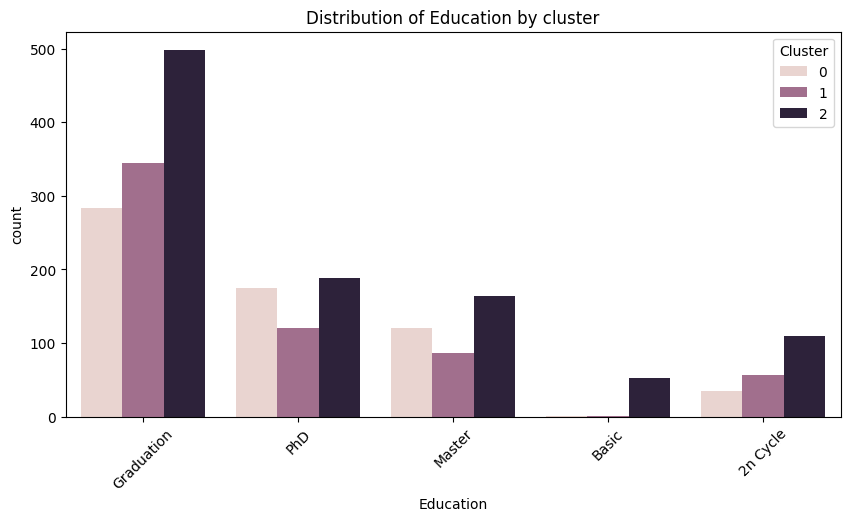

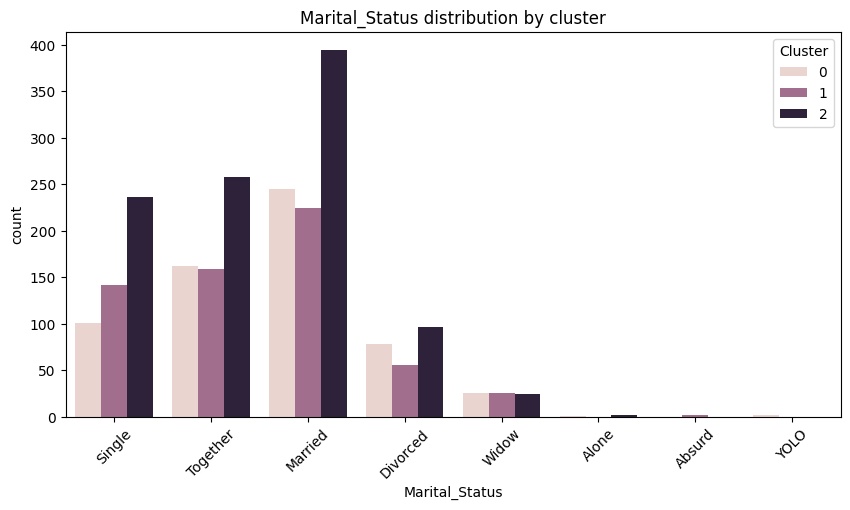

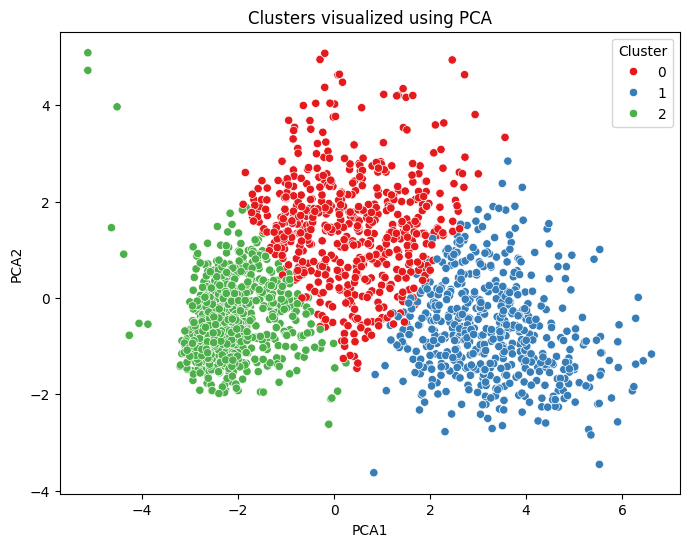

In [51]:
# --- 1. Perfil numérico: continuas y binarias ---
cluster_summary = df.groupby("Cluster")[continuas + binarias].mean()
print("📊 Promedios por cluster (continuas + binarias):")
print(cluster_summary)

# --- 2. Perfil categórico: Education ---
edu_dist = (
    df.groupby("Cluster")["Education"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)
print("\n📊 Educational distribution by cluster:")
print(edu_dist)

# --- 3. Perfil categórico: Marital_Status ---
marital_dist = (
    df.groupby("Cluster")["Marital_Status"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)
print("\n📊 Marital_Status distribution by cluster:")
print(marital_dist)

# --- 4. Visualización de variables continuas importantes (SIN BOXPLOT) ---
# Reemplazamos boxplots con tablas de resumen
print("\n📈 Resumen de variables clave por cluster:")
key_vars_summary = df.groupby("Cluster")[["Income", "MntWines", "MntMeatProducts"]].agg(['mean', 'median', 'std'])
print(key_vars_summary)

# --- 5. Visualización de Education ---
plt.figure(figsize=(10,5))
sns.countplot(x="Education", hue="Cluster", data=df)
plt.title("Distribution of Education by cluster")
plt.xticks(rotation=45)
plt.show()

# --- 6. Visualización de Marital_Status ---
plt.figure(figsize=(10,5))
sns.countplot(x="Marital_Status", hue="Cluster", data=df)
plt.title("Marital_Status distribution by cluster")
plt.xticks(rotation=45)
plt.show()

# --- 7. Reducción PCA para ver clusters en 2D ---
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:,0]
df["PCA2"] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set1")
plt.title("Clusters visualized using PCA")
plt.show()

In [52]:


silhouette_avg = silhouette_score(X_scaled, df["Cluster"])
print(f"🔎 Silhouette Score avg: {silhouette_avg:.3f}")


dbi = davies_bouldin_score(X_scaled, df["Cluster"])
print(f"🔎 Davies-Bouldin Index: {dbi:.3f}")

chi = calinski_harabasz_score(X_scaled, df["Cluster"])
print(f"🔎 Calinski-Harabasz Index: {chi:.3f}")



🔎 Silhouette Score avg: 0.201
🔎 Davies-Bouldin Index: 1.899
🔎 Calinski-Harabasz Index: 644.159


Decission Tree

In [53]:
# Features y target
X = X_scaled
y = df["Cluster"]


# Entrenar árbol con profundidad máxima de 4 (ajústalo si quieres más detalle)
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X, y)


DecisionTreeClassifier(max_depth=4, random_state=42)

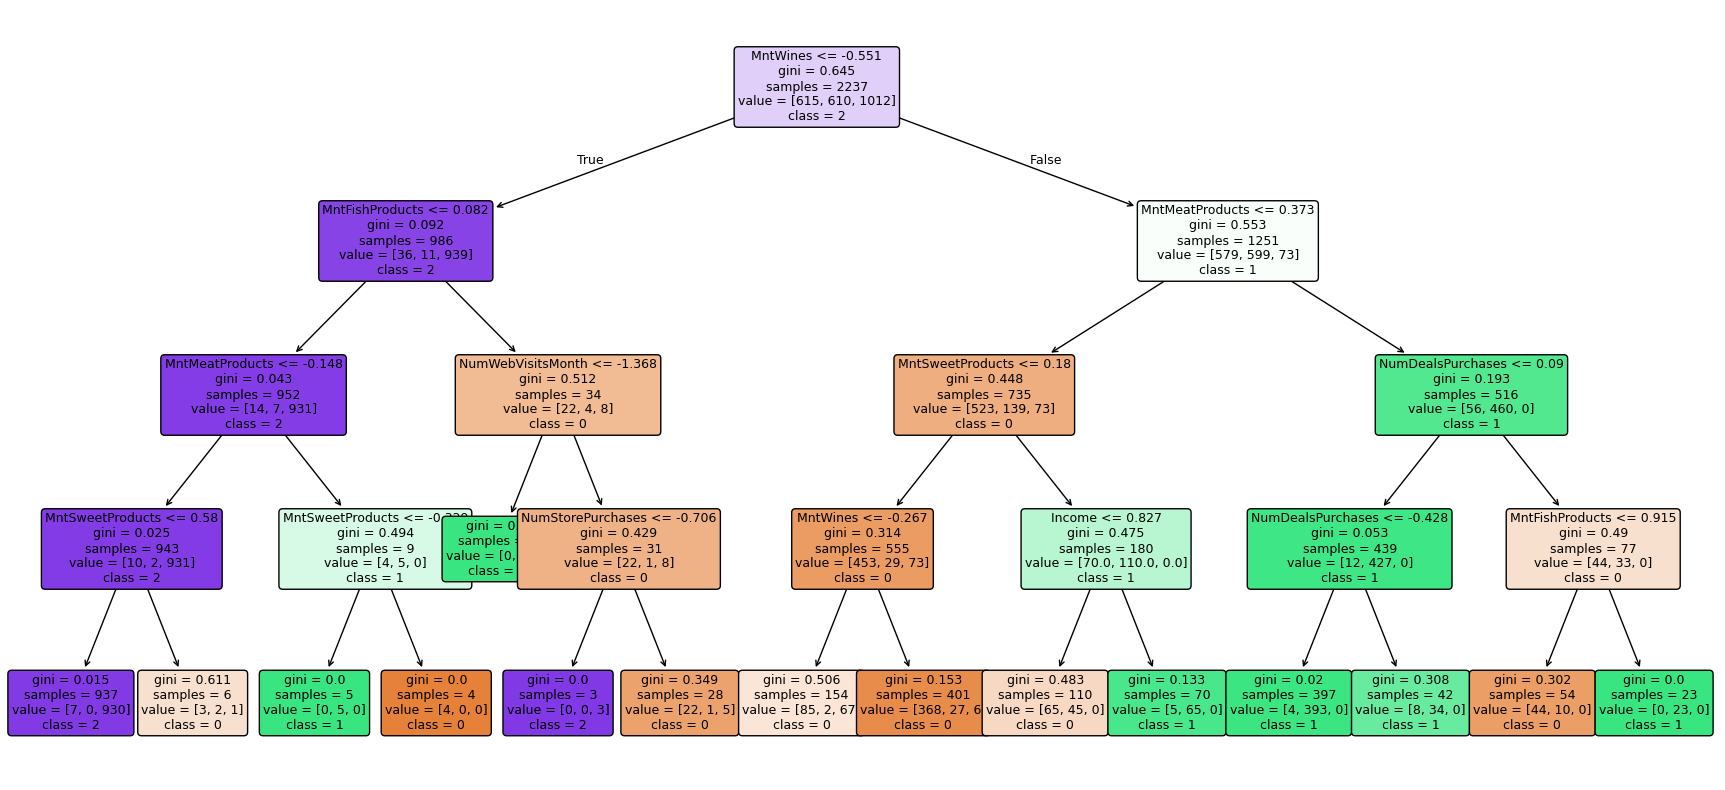

In [48]:


plt.figure(figsize=(22,10))
plot_tree(tree,
          feature_names=X.columns,
          class_names=[str(c) for c in tree.classes_],
          filled=True,
          rounded=True,
          fontsize=9)
plt.show()


In [49]:
feature_importance = pd.DataFrame({
    "Variable": X.columns,
    "Importance": tree.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n Importance of variables in the decision tree:")
print(feature_importance.head(10))


 Importance of variables in the decision tree:
             Variable  Importance
3            MntWines    0.591376
5     MntMeatProducts    0.234302
7    MntSweetProducts    0.068146
6     MntFishProducts    0.045053
9   NumDealsPurchases    0.035040
0              Income    0.019608
13  NumWebVisitsMonth    0.003500
12  NumStorePurchases    0.002976
2          Year_Birth    0.000000
1             Recency    0.000000


In [50]:
# --- Export cleaned ---
# Copy the original cleaned dataset and add the cluster labels
df_export = df.copy()

# Save as CSV
output_path = "clustered_customers.csv"
df_export.to_csv(output_path, index=False, encoding="utf-8")

print(f"✅ File exported: {output_path}")


✅ File exported: clustered_customers.csv
